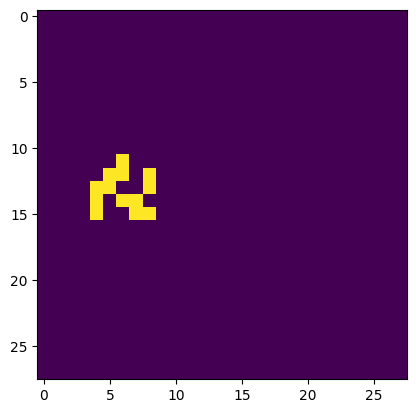

In [9]:
from masks import rf_mask, somatic_mask
import matplotlib.pyplot as plt
img_size = 28
d_local_mask = rf_mask([img_size,img_size], img_size**2, type='local', rf_size=16)
d_random_mask = rf_mask([img_size,img_size], img_size**2, type='random', rf_size=16)
single_rf = d_local_mask[0].view(28,28)
s_mask = somatic_mask(200, 100)
plt.imshow(single_rf)
plt.show()

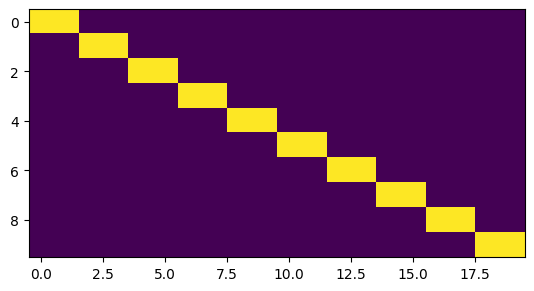

In [10]:
single_rf = d_local_mask[25].view(28,28)
s_mask = somatic_mask(20, 10)
plt.imshow(s_mask)
plt.show()

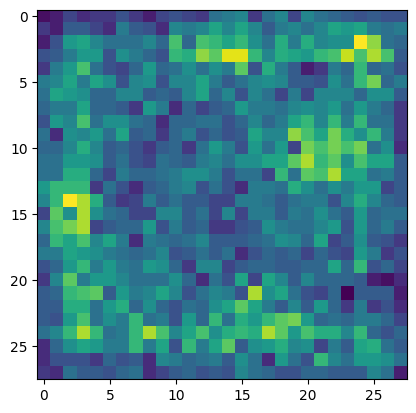

In [3]:
import torch
summed = torch.sum(d_local_mask.view(-1, 28, 28), dim=0)
summed /= torch.max(summed)
plt.imshow(summed)
plt.show()

In [5]:
from models import dANN, vANN, count_parameters
from train import train, test
import torchvision.datasets as datasets
from torchvision.transforms import v2
from torch.utils.data import DataLoader
import os
import torch

train_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),  # Converts to [0,1] range
    v2.Normalize(mean=[0.1307], std=[0.3081])  # MNIST-specific normalization
])


os.makedirs('./data', exist_ok=True)

In [ ]:




mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(mnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=128, shuffle=False)

sample = mnist_train[0]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = dANN([28,28], 256,32,10, 'local').to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
epochs = 5

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')




cuda
209514


Testing: 100%|██████████| 625/625 [00:04<00:00, 151.56it/s]


train loss: 1.7225063505172729, test loss: 1.6521585905075074, test accuracy: 0.8078


Testing: 100%|██████████| 625/625 [00:04<00:00, 151.60it/s]


train loss: 1.6507577699661256, test loss: 1.6272512691497802, test accuracy: 0.8333


 12%|█▏        | 458/3750 [00:04<00:29, 112.18it/s]


KeyboardInterrupt: 

In [11]:
fmnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
fmnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(fmnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=128, shuffle=False)

sample = fmnist_train[0][0]
sample_target = fmnist_train[0][1]
print(sample_target)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = dANN([28,28], 1024,254,10, 'local').to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
epochs = 20

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')

9
cpu
1066740


Testing: 100%|██████████| 79/79 [00:02<00:00, 27.09it/s]


train loss: 1.0156344885129664, test loss: 0.5623702093770232, test accuracy: 0.7966


Testing: 100%|██████████| 79/79 [00:02<00:00, 29.36it/s]


train loss: 0.4924597360177843, test loss: 0.4765417685237112, test accuracy: 0.8261


Testing: 100%|██████████| 79/79 [00:03<00:00, 23.75it/s]


train loss: 0.43252164141328603, test loss: 0.44022689929491354, test accuracy: 0.8415


Testing: 100%|██████████| 79/79 [00:03<00:00, 23.66it/s]


train loss: 0.40251569014622457, test loss: 0.4254935242329972, test accuracy: 0.8462


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.34it/s]


train loss: 0.3826760805682587, test loss: 0.40882786882074573, test accuracy: 0.853


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.00it/s]


train loss: 0.36787741861617895, test loss: 0.3924261671078356, test accuracy: 0.8562


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.52it/s]


train loss: 0.35470034134413386, test loss: 0.3823119833876815, test accuracy: 0.8631


Testing: 100%|██████████| 79/79 [00:03<00:00, 23.80it/s]


train loss: 0.3443335847559768, test loss: 0.3736806383615808, test accuracy: 0.8658


Testing: 100%|██████████| 79/79 [00:03<00:00, 25.99it/s]


train loss: 0.33557420826034506, test loss: 0.36625154240976404, test accuracy: 0.8688


Testing: 100%|██████████| 79/79 [00:03<00:00, 22.41it/s]


train loss: 0.32656634463938566, test loss: 0.3652019417738613, test accuracy: 0.867


Testing: 100%|██████████| 79/79 [00:03<00:00, 20.32it/s]


train loss: 0.3203743046471305, test loss: 0.3546313818874238, test accuracy: 0.8727


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.26it/s]


train loss: 0.3138698885944098, test loss: 0.3509423398896109, test accuracy: 0.8744


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.05it/s]


train loss: 0.30799802016220623, test loss: 0.34510084986686707, test accuracy: 0.8771


 76%|███████▌  | 356/469 [00:21<00:06, 16.40it/s]


KeyboardInterrupt: 

In [ ]:
fmnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
fmnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(fmnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=128, shuffle=False)

sample = fmnist_train[0][0]
sample_target = fmnist_train[0][1]
print(sample_target)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = vANN([28,28], 256,32,10).to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.01)
epochs = 20

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device, masked=False)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')

9
cpu
209514


Testing: 100%|██████████| 625/625 [00:03<00:00, 157.87it/s]


train loss: 0.6867819447425505, test loss: 0.6001250242710113, test accuracy: 0.8108


Testing: 100%|██████████| 625/625 [00:06<00:00, 94.23it/s] 


train loss: 0.570402087248365, test loss: 0.5576866467773914, test accuracy: 0.825


Testing: 100%|██████████| 625/625 [00:05<00:00, 111.23it/s]


train loss: 0.5332867049174073, test loss: 0.5551383134335279, test accuracy: 0.8305


Testing: 100%|██████████| 625/625 [00:04<00:00, 150.29it/s]


train loss: 0.5314795104071498, test loss: 0.5817412079870701, test accuracy: 0.8321


Testing: 100%|██████████| 625/625 [00:04<00:00, 126.25it/s]


train loss: 0.5132690154308337, test loss: 0.563063963471353, test accuracy: 0.8373


Testing: 100%|██████████| 625/625 [00:04<00:00, 144.47it/s]


train loss: 0.5248882070761174, test loss: 0.5548522709727287, test accuracy: 0.8442


Testing: 100%|██████████| 625/625 [00:05<00:00, 118.85it/s]


train loss: 0.5115832622138783, test loss: 0.5642714636534453, test accuracy: 0.8493


Testing: 100%|██████████| 625/625 [00:04<00:00, 148.82it/s]


train loss: 0.501454325351119, test loss: 0.6511095854759217, test accuracy: 0.8127


Testing: 100%|██████████| 625/625 [00:04<00:00, 153.94it/s]


train loss: 0.5016215972613544, test loss: 0.5748827050894498, test accuracy: 0.843


Testing: 100%|██████████| 625/625 [00:05<00:00, 118.23it/s]


train loss: 0.4945130720253413, test loss: 0.6706654647640884, test accuracy: 0.8015


Testing: 100%|██████████| 625/625 [00:05<00:00, 120.93it/s]


train loss: 0.5051805719228436, test loss: 0.6474963768601417, test accuracy: 0.8254


Testing: 100%|██████████| 625/625 [00:04<00:00, 130.45it/s]


train loss: 0.4867501896852007, test loss: 0.7250728768311441, test accuracy: 0.8279


Testing: 100%|██████████| 625/625 [00:04<00:00, 148.40it/s]


train loss: 0.4726869915845338, test loss: 0.6900695925414562, test accuracy: 0.8336


Testing: 100%|██████████| 625/625 [00:05<00:00, 117.86it/s]


train loss: 0.4863940643947882, test loss: 0.7320261053316295, test accuracy: 0.8449


 91%|█████████ | 3400/3750 [00:46<00:04, 72.56it/s] 


KeyboardInterrupt: 

211 [[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27]
 [ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
   46  47  48  49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
   74  75  76  77  78  79  80  81  82  83]
 [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
  102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
  130 131 132 133 134 135 136 137 138 139]
 [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
  158 159 160 161 162 163 164 165 166 167]
 [168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
  186 187 188 189 190 191 192 193 194 195]
 [196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
  214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 237 23

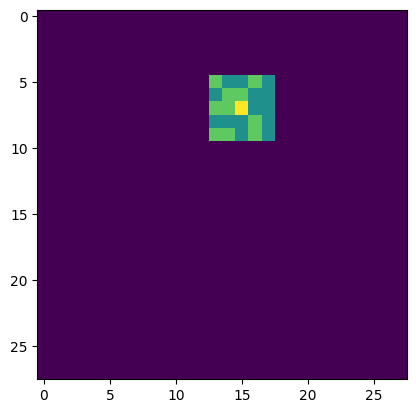

In [3]:
import numpy as np
import scipy.ndimage as scn
import torch


def nb_vals(matrix, index, size):

    coords = np.unravel_index(index, matrix.shape)
    arr_shape = matrix.shape
    dist = np.ones(arr_shape)
    dist[coords] = 0
    dist = scn.distance_transform_cdt(dist, metric='chessboard')
    
    nb_indices = np.transpose(np.nonzero(dist <= size))
    return nb_indices

seed = 1
rng = np.random.default_rng(seed)
image_size = [28, 28]
layer_size = image_size[0]*image_size[1]
image =  np.arange(layer_size).reshape((image_size[0], image_size[1]))
center = 211
nb = nb_vals(image, center, 2)

synapses = rng.choice(nb, 16)
print(center,image, nb)
vis = np.zeros(image_size)
for coord in nb:
    vis[coord[0], coord[1]] = 0.5
for coord in synapses:
    vis[coord[0], coord[1]] = 0.75


ravelled = np.ravel_multi_index((synapses[:, 0], synapses[:, 1]), (28, 28))
print(ravelled)
vis[np.unravel_index(center, image.shape)] = 1.0
plt.imshow(vis)
plt.show()